In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [5]:
data=df[['Annual_Income_(k$)', 'Spending_Score']]
data

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Annual_Income_(k$)  200 non-null    int64
 1   Spending_Score      200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [11]:
X = df.iloc[:, [2, 3]].values
X

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

In [12]:
from sklearn.cluster import KMeans
wc_ss=[]
for i in range (1, 11):
    kmeans_clu=KMeans(n_clusters=i, random_state=42)
    kmeans_clu.fit(X)
    wc_ss.append(kmeans_clu.inertia_)

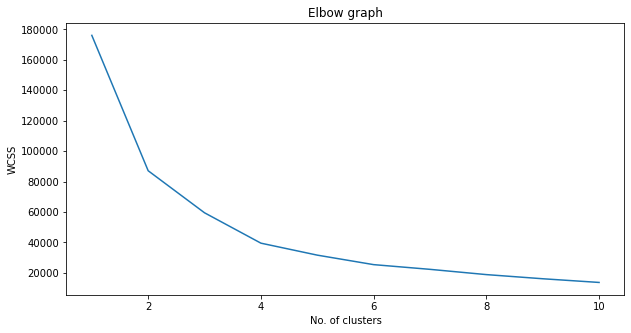

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wc_ss)
plt.title("Elbow graph")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
#We can see elbow starts from 5 so lets consider k value as 5 and fitting kmeans to the data
Y=KMeans(n_clusters=5, random_state=42)
y_kmeans=Y.fit_predict(X)

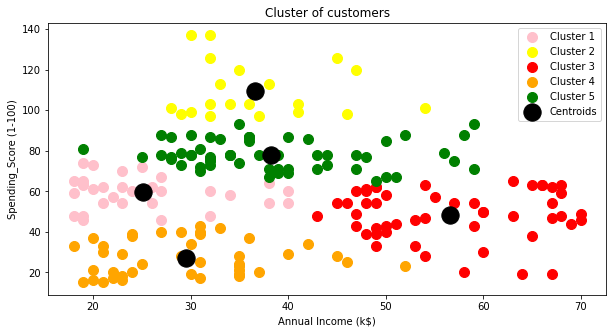

In [30]:
plt.figure(figsize=(10,5))

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='pink', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='yellow', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='red', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='orange', label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='green', label='Cluster 5')
plt.scatter(Y.cluster_centers_[:, 0], Y.cluster_centers_[:,1], s=300, c='black', label='Centroids')

plt.title("Cluster of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending_Score (1-100)")
plt.legend()
plt.show()